# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)
 3. Moving Average [Here](https://towardsdatascience.com/predict-electricity-consumption-using-time-series-analysis-4650284e40aa)
 4. Finding the best model's parameters
 5. Predictions

3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [44]:
# Load libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import time
import math
import seaborn as sns

from matplotlib.pyplot import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from datetime import date
from matplotlib import pyplot as plt
from numpy.random import seed
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
#from tensorflow import set_random_seed
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import plot_model


# plot within notebook
%matplotlib inline

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
## load parameters
# scaler = MinMaxScaler(feature_range=(0, 1))

# set figure size
rcParams['figure.figsize'] = 12, 7

In [3]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv') #,  index_col='Date', parse_dates=['Date'], date_parser=dateparse)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

In [4]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


### 2. Exploratory Data Analysis (EDA)

Workspace details [here](https://github.com/erojaso/Forecasting-Stock-Prices/blob/master/01_workspace_stock_price_forecast_eda.ipynb)

The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

### 2.1 General view

In [5]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)

Text(0, 0.5, 'USD')

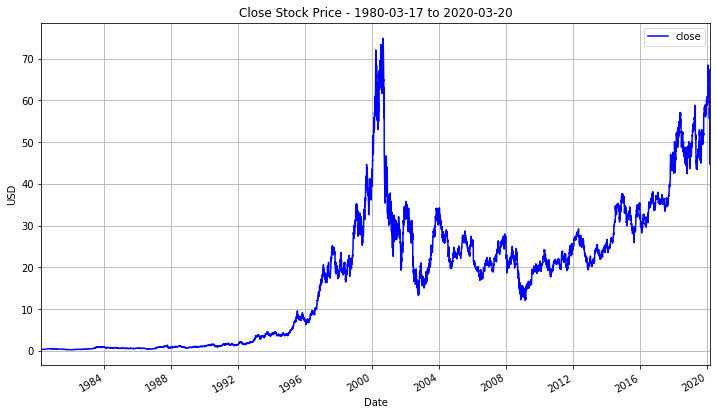

In [6]:
# plot close over time
rcParams['figure.figsize'] = 12, 7
ax = df.plot(y='close', style='b-', grid=True, title='Close Stock Price - 1980-03-17 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [7]:
df.describe()

,open,high,low,close,volume
count,10090.000000,10090.000000,10090.000000,10090.000000,1.009000e+04
mean,17.744796,17.988726,17.501696,17.743389,5.175399e+07
std,16.084734,16.313632,15.864770,16.085440,3.555889e+07
min,0.218800,0.218800,0.216100,0.216100,0.000000e+00
25%,1.130200,1.149350,1.117200,1.132800,2.760502e+07
50%,19.260000,19.500000,19.029950,19.250000,4.622693e+07
75%,27.306750,27.617500,26.909750,27.270000,6.631072e+07
max,75.630000,75.810000,73.630000,74.880000,5.677088e+08


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1984 until the present. Values older than 3 years will not be considered in this preliminary investigation. Part of this decision is based on the historical values shown from the origin 1980 until late of 2017. Therefore, observations with more than 3 years will be removed.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [8]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)

In [9]:
# set start and end date range
start_date = dt.datetime(2018, 1, 31)
end_date = dt.datetime(2021, 1, 31)

# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [10]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(538, 4)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 538 entries, 2018-01-31 to 2020-03-20
Data columns (total 4 columns):
open     538 non-null float64
high     538 non-null float64
low      538 non-null float64
close    538 non-null float64
dtypes: float64(4)
memory usage: 21.0 KB
None

 First data rows:


,open,high,low,close
date,,,,
2018-01-31,49.230,49.25,47.5600,48.14
2018-02-01,47.695,48.47,47.4500,47.65
2018-02-02,47.320,47.79,46.1000,46.15
2018-02-05,46.350,47.26,44.5000,44.52
2018-02-06,44.020,44.93,43.0302,44.91


In [11]:
df_adj.describe()

,open,high,low,close
count,538.000000,538.000000,538.000000,538.000000
mean,51.373111,51.989972,50.795581,51.392565
std,5.179134,5.152480,5.196410,5.197871
min,43.350000,44.280000,42.040000,42.420000
25%,47.415000,47.996250,46.785000,47.382500
50%,50.510000,51.255000,50.000000,50.730000
75%,54.355000,54.737500,53.800000,54.355000
max,67.630000,69.290000,67.310000,68.470000


The adjustment of the proposed data returns 538 observacions and the 'mean' around 51+/-0.95 and 'standard deviation' of 5+/-0.01. Also the minimum and maximum value changed have been moved for the dependent variable 'Close Price' from: minimum (from 0.21 to 42.42) and maximum (from 74.88 to 68.47).

These could be preliminary clues to a stationary series, the data are clustered, and it is difficult to support this hypothesis.

Text(0, 0.5, 'USD')

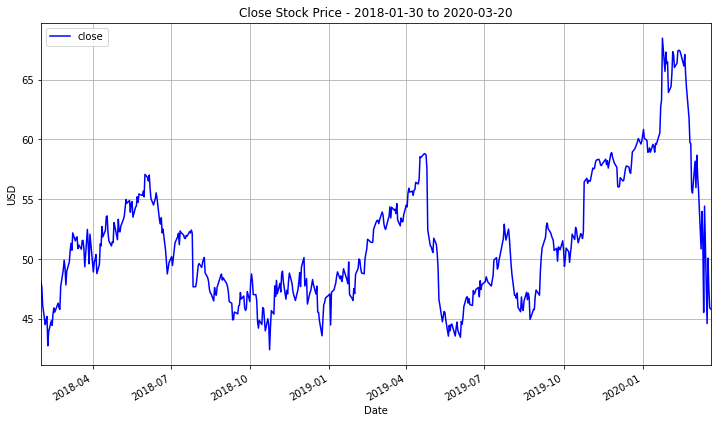

In [12]:
# plot close over time - after adjustments
rcParams['figure.figsize'] = 12, 7
ax = df_adj.plot(y='close', style='b-', grid=True, title='Close Stock Price - 2018-01-30 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

Therefore we need to ensure that our 'is not stationary' series. Under this scenary, we need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

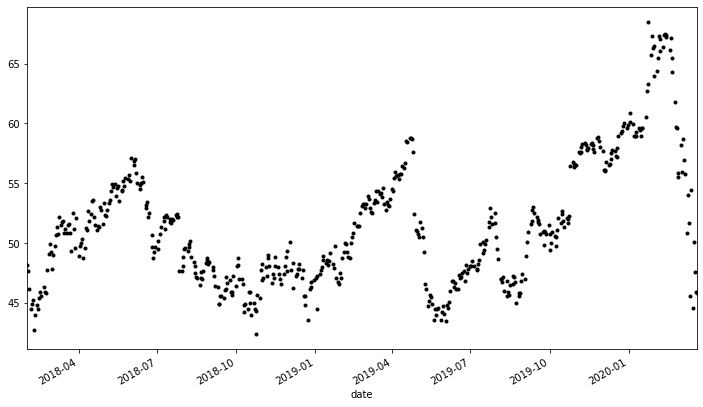

In [13]:
# plot the scatterplot:
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

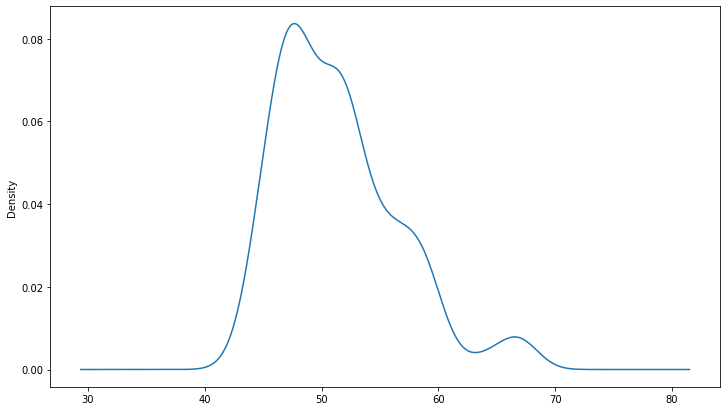

In [14]:
# Distribution of the dataset
rcParams['figure.figsize'] = 12, 7
df_adj.close.plot(kind='kde')

We can observe a distribution close to a normal distribution (bell curve) with a slight bias to its right on the closing values. This will possibly require us to adjust the values during data cleaning.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

### 2.2 Time Series Decomposition

In [15]:
from numpy.random import seed
import tensorflow as tf

#### Input params ##################
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set

N = 9                          # for feature at day t, we use lags from t-1, t-2, ..., t-N as features. 
                               # initial value before tuning
lstm_units=50                  # lstm param. initial value before tuning.
dropout_prob=1                 # lstm param. initial value before tuning.
optimizer='adam'               # lstm param. initial value before tuning.
epochs=1                       # lstm param. initial value before tuning.
batch_size=1                   # lstm param. initial value before tuning.

model_seed = 100

fontsize = 14
ticklabelsize = 14
####################################

# Set seeds to ensure same output results
seed(101)
tf.random.set_seed(model_seed) # set_random_seed(model_seed)

In [16]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
def get_x_y(data, N, offset):
    """
    Split data into x (features) and y (target)
    """
    x, y = [], []
    for i in range(offset, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x = np.array(x)
    y = np.array(y)
    
    return x, y

In [18]:
def get_x_scaled_y(data, N, offset):
    """
    Split data into x (features) and y (target)
    We scale x to have mean 0 and std dev 1, and return this.
    We do not scale y here.
    Inputs
        data     : pandas series to extract x and y
        N
        offset
    Outputs
        x_scaled : features used to predict y. Scaled such that each element has mean 0 and std dev 1
        y        : target values. Not scaled
        mu_list  : list of the means. Same length as x_scaled and y
        std_list : list of the std devs. Same length as x_scaled and y
    """
    x_scaled, y, mu_list, std_list = [], [], [], []
    for i in range(offset, len(data)):
        mu_list.append(np.mean(data[i-N:i]))
        std_list.append(np.std(data[i-N:i]))
        x_scaled.append((data[i-N:i]-mu_list[i-offset])/std_list[i-offset])
        y.append(data[i])
    x_scaled = np.array(x_scaled)
    y = np.array(y)
    
    return x_scaled, y, mu_list, std_list

In [19]:
def train_pred_eval_model(x_train_scaled, \
                          y_train_scaled, \
                          x_cv_scaled, \
                          y_cv, \
                          mu_cv_list, \
                          std_cv_list, \
                          lstm_units=50, \
                          dropout_prob=0.5, \
                          optimizer='adam', \
                          epochs=1, \
                          batch_size=1):
    '''
    Train model, do prediction, scale back to original range and do evaluation
    Use LSTM here.
    Returns rmse, mape and predicted values
    Inputs
        x_train_scaled  : e.g. x_train_scaled.shape=(451, 9, 1). Here we are using the past 9 values to predict the next value
        y_train_scaled  : e.g. y_train_scaled.shape=(451, 1)
        x_cv_scaled     : use this to do predictions 
        y_cv            : actual value of the predictions
        mu_cv_list      : list of the means. Same length as x_scaled and y
        std_cv_list     : list of the std devs. Same length as x_scaled and y 
        lstm_units      : lstm param
        dropout_prob    : lstm param
        optimizer       : lstm param
        epochs          : lstm param
        batch_size      : lstm param
    Outputs
        rmse            : root mean square error
        mape            : mean absolute percentage error
        est             : predictions
    '''
    # Create the LSTM network
    model = Sequential()
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train_scaled.shape[1],1)))
    model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
    model.add(LSTM(units=lstm_units))
    model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
    model.add(Dense(1))

    # Compile and fit the LSTM network
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    model.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=0)
    
    # Do prediction
    est_scaled = model.predict(x_cv_scaled)
    est = (est_scaled * np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    
    # Calculate RMSE and MAPE
#     print("x_cv_scaled = " + str(x_cv_scaled))
#     print("est_scaled = " + str(est_scaled))
#     print("est = " + str(est))
    rmse = math.sqrt(mean_squared_error(y_cv, est))
    mape = get_mape(y_cv, est)
    
    return rmse, mape, est

In [21]:
# remove volume attribute
df_adj.drop('open', axis=1, inplace=True)
df_adj.drop('high', axis=1, inplace=True)
df_adj.drop('low', axis=1, inplace=True)

### 4. Feature Engineering

In [24]:
# create empty dataset with dimension: range(start, finish): row=0 to len(df) 'all rows'
new_data = pd.DataFrame(index=range(0, len(df_adj)), columns=['Date', 'Close'])
new_data.head(5)

# copy values to new structure
for i in range(0, len(df_adj)):
    new_data['Date'][i] = df_adj.index[i]
    new_data['Close'][i] = df_adj.close[i]
    
new_data.info()
print('\n')    
new_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 2 columns):
Date     538 non-null object
Close    538 non-null object
dtypes: object(2)
memory usage: 8.5+ KB




,Date,Close
0,2018-01-31 00:00:00,48.14
1,2018-02-01 00:00:00,47.65
2,2018-02-02 00:00:00,46.15
3,2018-02-05 00:00:00,44.52
4,2018-02-06 00:00:00,44.91


In [26]:
from fastai.tabular import add_datepart

add_datepart(new_data, 'Date', drop=False)
new_data.drop('Elapsed', axis=1, inplace=True)  # don't need this

new_data.head()

,Date,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2018-01-31,48.14,2018,1,5,31,2,31,True,False,False,False,False,False
1,2018-02-01,47.65,2018,2,5,1,3,32,False,True,False,False,False,False
2,2018-02-02,46.15,2018,2,5,2,4,33,False,False,False,False,False,False
3,2018-02-05,44.52,2018,2,6,5,0,36,False,False,False,False,False,False
4,2018-02-06,44.91,2018,2,6,6,1,37,False,False,False,False,False,False


### 3. Training, Validation, Test split

In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 14 columns):
Date                538 non-null datetime64[ns]
Close               538 non-null object
Year                538 non-null int64
Month               538 non-null int64
Week                538 non-null int64
Day                 538 non-null int64
Dayofweek           538 non-null int64
Dayofyear           538 non-null int64
Is_month_end        538 non-null bool
Is_month_start      538 non-null bool
Is_quarter_end      538 non-null bool
Is_quarter_start    538 non-null bool
Is_year_end         538 non-null bool
Is_year_start       538 non-null bool
dtypes: bool(6), datetime64[ns](1), int64(6), object(1)
memory usage: 36.9+ KB


In [41]:
# Get sizes of each of the datasets
num_cv = int(cv_size*len(new_data))
num_test = int(test_size*len(new_data))
num_train = len(new_data) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = new_data[:num_train][['Date', 'Close']]
cv = new_data[num_train:num_train+num_cv][['Date', 'Close']]
train_cv = new_data[:num_train+num_cv][['Date', 'Close']]
test = new_data[num_train+num_cv:][['Date', 'Close']]

print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 324
num_cv = 107
num_test = 107
train.shape = (324, 2)
cv.shape = (107, 2)
train_cv.shape = (431, 2)
test.shape = (107, 2)


### 5. Feature Scaling

In [46]:
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train['Close']).reshape(-1,1))
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))

# Split into x and y
x_train_scaled, y_train_scaled = get_x_y(train_scaled, N, N)
print("x_train_scaled.shape = " + str(x_train_scaled.shape)) # (446, 7, 1)
print("y_train_scaled.shape = " + str(y_train_scaled.shape)) # (446, 1)

scaler.mean_ = [50.017469]
scaler.var_ = [12.160103]
x_train_scaled.shape = (315, 9, 1)
y_train_scaled.shape = (315, 1)


In [47]:
# Scale the cv dataset
# Split into x and y
x_cv_scaled, y_cv, mu_cv_list, std_cv_list = get_x_scaled_y(np.array(train_cv['Close']).reshape(-1,1), N, num_train)
print("x_cv_scaled.shape = " + str(x_cv_scaled.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("len(mu_cv_list) = " + str(len(mu_cv_list)))
print("len(std_cv_list) = " + str(len(std_cv_list)))

x_cv_scaled.shape = (107, 9, 1)
y_cv.shape = (107, 1)
len(mu_cv_list) = 107
len(std_cv_list) = 107


In [51]:
# Here we scale the train_cv set, for the final model
scaler_final = StandardScaler()
train_cv_scaled_final = scaler_final.fit_transform(np.array(train_cv['Close']).reshape(-1,1))
print("scaler_final.mean_ = " + str(scaler_final.mean_))
print("scaler_final.var_ = " + str(scaler_final.var_))

# # Scale the test dataset
x_test_scaled, y_test, mu_test_list, std_test_list = get_x_scaled_y(np.array(['Close']).reshape(-1,1), N, num_train+num_cv)
print("x_test_scaled.shape = " + str(x_test_scaled.shape))
print("y_test.shape = " + str(y_test.shape))
print("len(mu_test_list) = " + str(len(mu_test_list)))
print("len(std_test_list) = " + str(len(std_test_list)))

scaler_final.mean_ = [49.611578]
scaler_final.var_ = [11.393789]
x_test_scaled.shape = (0,)
y_test.shape = (0,)
len(mu_test_list) = 0
len(std_test_list) = 0


### Create and fit the LSTM network

In [52]:
# Create the LSTM network
model = Sequential()
model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train_scaled.shape[1],1)))
model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
model.add(LSTM(units=lstm_units))
model.add(Dropout(dropout_prob)) # Add dropout with a probability of 0.5
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=optimizer)
model.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/1
 - 4s - loss: 0.2601


In [53]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 9, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


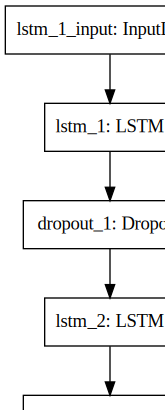

In [54]:
# Plot model and save to file
# pip install pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model_v4a.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [55]:
# Do prediction
est_scaled = model.predict(x_cv_scaled)
est = (est_scaled * np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
print("est.shape = " + str(est.shape))

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, est))
print("RMSE = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_pct_bef_tuning = get_mape(y_cv, est)
print("MAPE = %0.3f%%" % mape_pct_bef_tuning)

est.shape = (107, 1)
RMSE = 1.432
MAPE = 2.252%


Text(0, 0.5, 'USD')

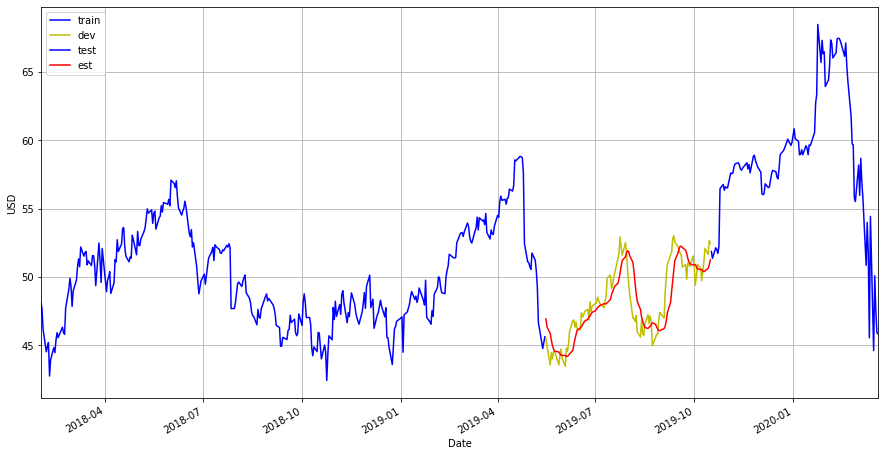

In [62]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est.reshape(-1), 
                       'y_cv': y_cv.reshape(-1),
                       'date': cv['Date']})

ax = train.plot(x='Date', y='Close', style='b-', grid=True)
ax = cv.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Close', style='b-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'est'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")

### Tuning N (no. of days to use as features)

In [63]:
param_label = 'N'
param_list = range(3, 60)

error_rate = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x_train_scaled, y_train_scaled = get_x_y(train_scaled, param, param)

    # Split cv into x and y
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = get_x_scaled_y(np.array(train_cv['Close']).reshape(-1,1), param, num_train)
    
    # Train, predict and eval model
    rmse, mape, _ = train_pred_eval_model(x_train_scaled, \
                                          y_train_scaled, \
                                          x_cv_scaled, \
                                          y_cv, \
                                          mu_cv_list, \
                                          std_cv_list, \
                                          lstm_units=lstm_units, \
                                          dropout_prob=dropout_prob, \
                                          optimizer=optimizer, \
                                          epochs=epochs, \
                                          batch_size=batch_size)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate


Minutes taken = 9.583462274074554


,N,rmse,mape_pct
0,3,1.044548,1.687949
1,4,1.168709,1.839252
2,5,1.235631,1.947440
3,6,1.371610,2.151647
4,7,1.371216,2.145359
5,8,1.393512,2.180989
6,9,1.398423,2.197020
7,10,1.412967,2.229926
8,11,1.325293,2.074808
9,12,1.386413,2.164603


Text(0, 0.5, 'RMSE/MAPE(%)')

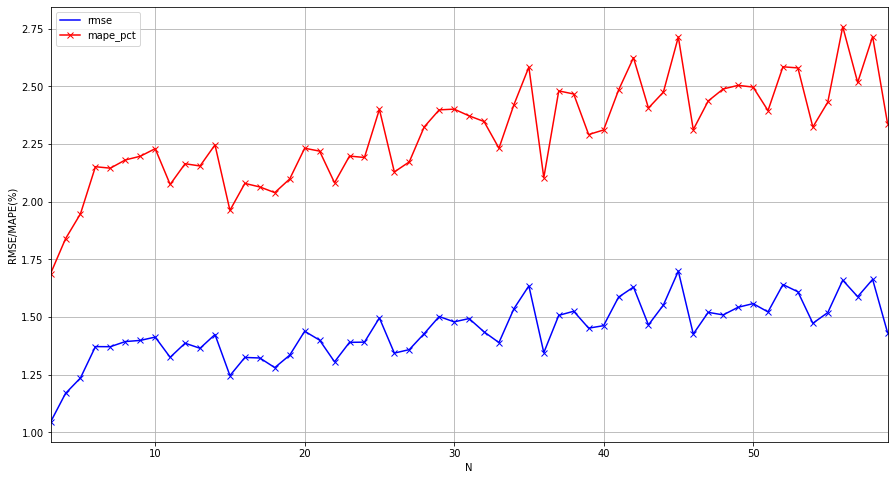

In [64]:
# Plot RMSE 
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

ax = error_rate.plot(x='N', y='rmse', style='bx-', grid=True)
ax = error_rate.plot(x='N', y='mape_pct', style='rx-', grid=True, ax=ax)
ax.set_xlabel("N")
ax.set_ylabel("RMSE/MAPE(%)")

In [65]:
# Get optimum value for param
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
N_opt = temp['N'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum " + param_label + " = " + str(N_opt))

min RMSE = 1.045
min MAPE = 1.688%
optimum N = 3


In [66]:
param_list = [1, 10, 20, 30, 40, 50]

param2_label = 'batch_size'
param2_list = [8, 16, 32, 64, 128]

# Split train into x and y
x_train_scaled, y_train_scaled = get_x_y(train_scaled, N_opt, N_opt)

# Split cv into x and y
x_cv_scaled, y_cv, mu_cv_list, std_cv_list = get_x_scaled_y(np.array(train_cv['Close']).reshape(-1,1), N_opt, num_train)

error_rate = {param_label: [], param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    for param2 in tqdm_notebook(param2_list):
    
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(x_train_scaled, \
                                              y_train_scaled, \
                                              x_cv_scaled, \
                                              y_cv, \
                                              mu_cv_list, \
                                              std_cv_list, \
                                              lstm_units=lstm_units, \
                                              dropout_prob=dropout_prob, \
                                              optimizer=optimizer, \
                                              epochs=param, \
                                              batch_size=param2)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate



Minutes taken = 2.9415341059366864


,N,batch_size,rmse,mape_pct
0,1,8,1.052834,1.699091
1,1,16,0.964750,1.567571
2,1,32,0.952603,1.549217
3,1,64,0.947438,1.541603
4,1,128,0.944644,1.538963
5,10,8,0.976183,1.587195
6,10,16,1.049806,1.693555
7,10,32,1.069895,1.725842
8,10,64,1.049151,1.693269
9,10,128,1.025492,1.656234


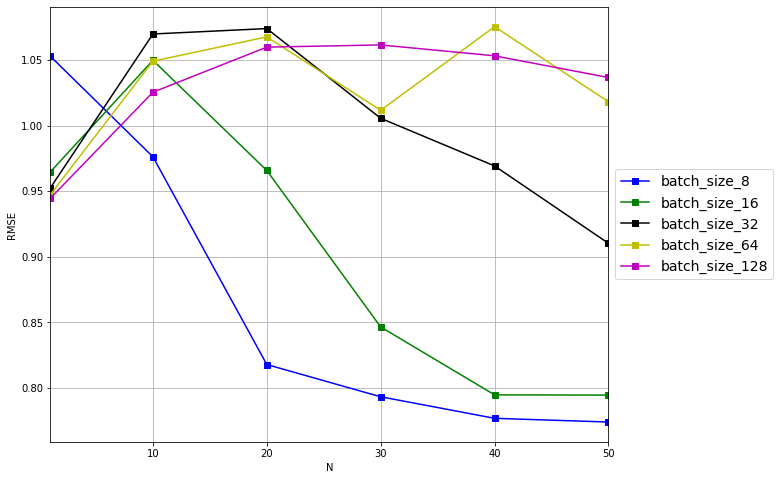

In [68]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
matplotlib.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure
# ax.set_xlim([10, 50])
# ax.set_ylim([0, 5])

In [69]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epochs_opt = temp[param_label].values[0]
batch_size_opt = temp[param2_label].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum " + param_label + " = " + str(epochs_opt))
print("optimum " + param2_label + " = " + str(batch_size_opt))

min RMSE = 0.774
min MAPE = 1.319%
optimum N = 50
optimum batch_size = 8


### Tuning model - LSTM units and dropout prob

In [70]:
param_list = [10, 50, 64, 128]

param2_label = 'dropout_prob'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [], param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    for param2 in tqdm_notebook(param2_list):
    
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(x_train_scaled, \
                                              y_train_scaled, \
                                              x_cv_scaled, \
                                              y_cv, \
                                              mu_cv_list, \
                                              std_cv_list, \
                                              lstm_units=param, \
                                              dropout_prob=param2, \
                                              optimizer=optimizer, \
                                              epochs=epochs_opt, \
                                              batch_size=batch_size_opt)
    
        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate



Minutes taken = 6.607845930258433


,N,dropout_prob,rmse,mape_pct
0,10,0.5,0.987459,1.604254
1,10,0.6,0.998975,1.620004
2,10,0.7,1.004506,1.628054
3,10,0.8,1.018435,1.647496
4,10,0.9,0.989698,1.605187
5,10,1.0,0.823963,1.379353
6,50,0.5,0.804973,1.353911
7,50,0.6,0.819897,1.370454
8,50,0.7,0.845361,1.404643
9,50,0.8,0.931723,1.524238


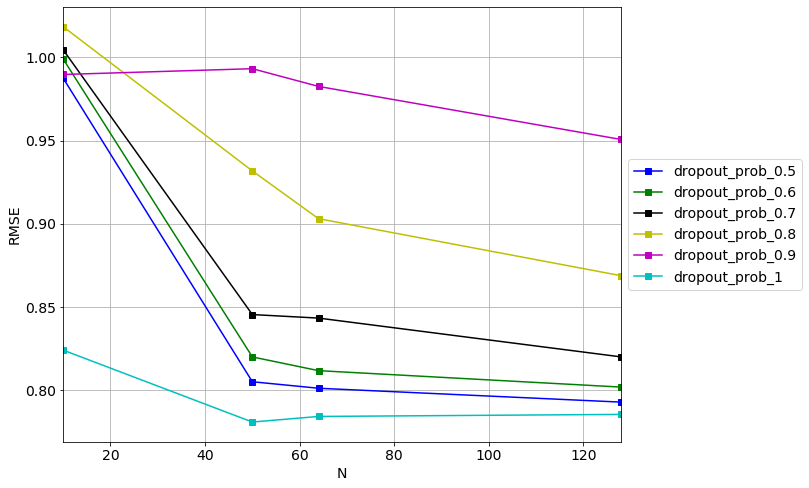

In [71]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
matplotlib.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [72]:
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
lstm_units_opt = temp[param_label].values[0]
dropout_prob_opt = temp[param2_label].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum " + param_label + " = " + str(lstm_units_opt))
print("optimum " + param2_label + " = " + str(dropout_prob_opt))

min RMSE = 0.781
min MAPE = 1.329%
optimum N = 50
optimum dropout_prob = 1.0


### Tuning model - optimizer

In [73]:
param_label = 'optimizer'
param_list = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']

error_rate = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
   
    # Train, predict and eval model
    rmse, mape, _ = train_pred_eval_model(x_train_scaled, \
                                          y_train_scaled, \
                                          x_cv_scaled, \
                                          y_cv, \
                                          mu_cv_list, \
                                          std_cv_list, \
                                          lstm_units=lstm_units_opt, \
                                          dropout_prob=dropout_prob_opt, \
                                          optimizer=param, \
                                          epochs=epochs_opt, \
                                          batch_size=batch_size_opt)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape_pct'].append(mape)
    
error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate


Minutes taken = 1.48403080701828


,optimizer,rmse,mape_pct
0,adam,0.787532,1.340478
1,sgd,0.994050,1.612766
2,rmsprop,0.784436,1.335444
3,adagrad,0.814823,1.372305
4,adadelta,0.763776,1.302201
5,adamax,0.820538,1.375627
6,nadam,0.775223,1.320805


Text(0, 0.5, 'RMSE/MAPE(%)')

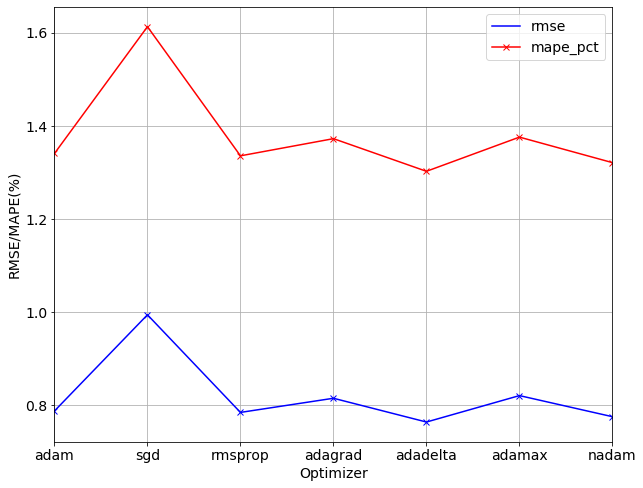

In [74]:
# Plot RMSE 
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate.plot(x='optimizer', y='rmse', style='bx-', grid=True)
ax = error_rate.plot(x='optimizer', y='mape_pct', style='rx-', grid=True, ax=ax)
ax.set_xticklabels(param_list)
ax.set_xlabel("Optimizer")
ax.set_ylabel("RMSE/MAPE(%)")

In [75]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
optimizer_opt = temp[param_label].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum " + param_label + " = " + str(optimizer_opt))

min RMSE = 0.764
min MAPE = 1.302%
optimum optimizer = adadelta


### Tuned params

In [76]:
d = {'param': ['N', 'lstm_units', 'dropout_prob', 'optimizer', 'epochs', 'batch_size', 'rmse', 'mape_pct'],
     'original': [N, lstm_units, dropout_prob, optimizer, epochs, batch_size, rmse_bef_tuning, mape_pct_bef_tuning],
     'after_tuning': [N_opt, lstm_units_opt, dropout_prob_opt, optimizer_opt, epochs_opt, batch_size_opt, error_rate['rmse'].min(), error_rate['mape_pct'].min()]}
tuned_params = pd.DataFrame(d)
tuned_params

,param,original,after_tuning
0,N,9,3
1,lstm_units,50,50
2,dropout_prob,1,1
3,optimizer,adam,adadelta
4,epochs,1,50
5,batch_size,1,8
6,rmse,1.432,0.763776
7,mape_pct,2.25158,1.3022


### 7. Applying the Model

In [77]:
# Split train_cv into x and y
x_train_cv_scaled, y_train_cv_scaled = get_x_y(train_cv_scaled_final, N_opt, N_opt)

# Split test into x and y
x_test_scaled, y_test, mu_test_list, std_test_list = get_x_scaled_y(np.array(new_data['Close']).reshape(-1,1), N_opt, num_train+num_cv)

# Train, predict and eval model
rmse, mape, est = train_pred_eval_model(x_train_cv_scaled, \
                                        y_train_cv_scaled, \
                                        x_test_scaled, \
                                        y_test, \
                                        mu_test_list, \
                                        std_test_list, \
                                        lstm_units=lstm_units_opt, \
                                        dropout_prob=dropout_prob_opt, \
                                        optimizer=optimizer_opt, \
                                        epochs=epochs_opt, \
                                        batch_size=batch_size_opt)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 1.874
MAPE on test set = 1.964%


Text(0, 0.5, 'USD')

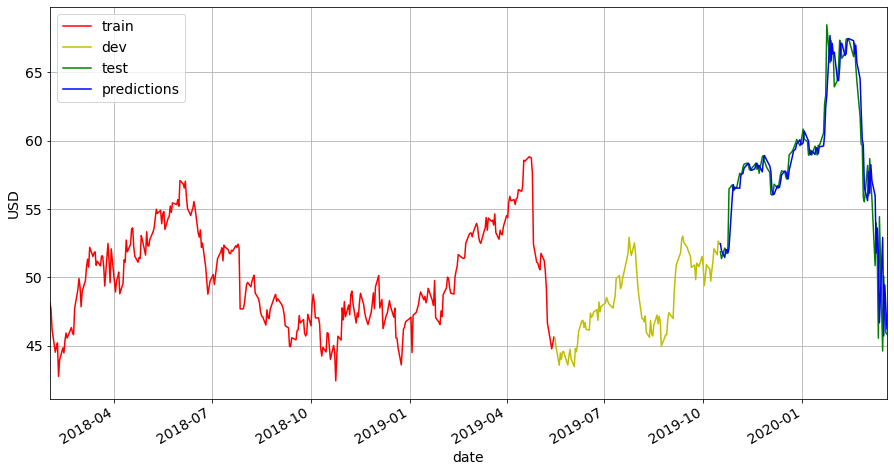

In [106]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est.reshape(-1), 
                       'Date': new_data[num_train+num_cv:]['Date']})


ax = train.plot(x='Date', y='Close', style='r-', grid=True)
ax = cv.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='b-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

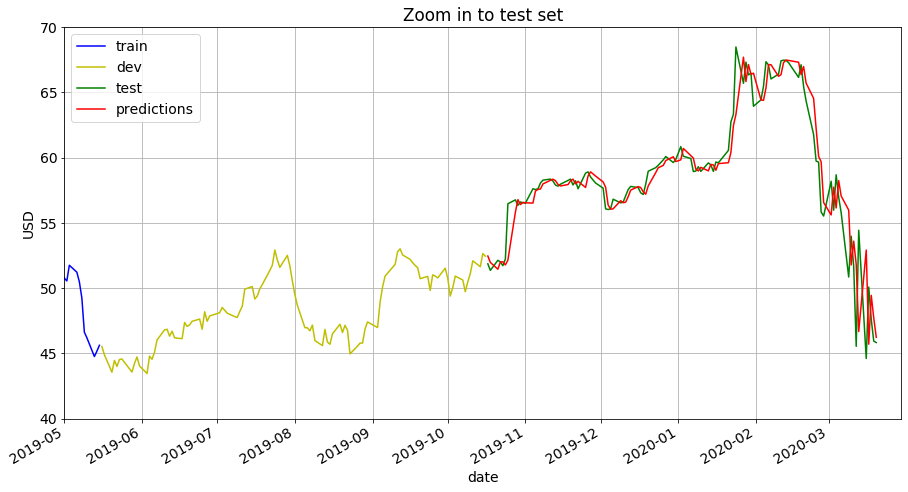

In [113]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8
ax = train.plot(x='Date', y='Close', style='b-', grid=True)
ax = cv.plot(x='Date', y='Close', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='Close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2019, 5, 1), date(2020, 3, 30)])
ax.set_ylim([40, 70])
ax.set_title("Zoom in to test set")

(40, 70)

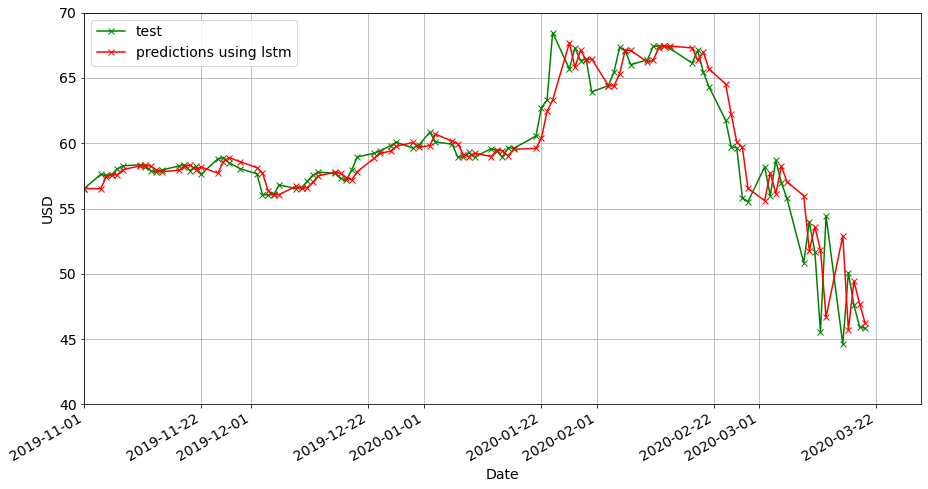

In [120]:
rcParams['figure.figsize'] = 15, 8 # width 10, height 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='Date', y='Close', style='gx-', grid=True)
ax = est_df.plot(x='Date', y='est', style='rx-', grid=True, ax=ax)
ax.legend(['test', 'predictions using lstm'], loc='upper left')
ax.set_xlabel("Date")
ax.set_ylabel("USD")
ax.set_xlim([date(2019, 11, 1), date(2020, 3, 30)])
ax.set_ylim([40, 70])